In [41]:
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


In [2]:
# Load dataset
data = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)


In [3]:
# Baseline without PCA
model = LogisticRegression(max_iter=500)
start = time.time()
model.fit(X_train, y_train)
train_time_no_pca = time.time() - start
y_pred = model.predict(X_test)
accuracy_no_pca = accuracy_score(y_test, y_pred)
f1_no_pca = f1_score(y_test, y_pred)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [38]:
# Apply PCA
pca = PCA(n_components=0.90)  # Retain 95% of variance
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

#I tried n_component too many but get best result with this.

In [21]:
model_pca = LogisticRegression(max_iter=500)
start = time.time()
model_pca.fit(X_train_pca, y_train)
train_time_pca = time.time() - start
y_pred_pca = model_pca.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, y_pred_pca)
f1_pca = f1_score(y_test, y_pred_pca)


In [22]:
# Display results
print(f"Without PCA: Accuracy={accuracy_no_pca:.4f}, F1 Score={f1_no_pca:.4f}, Training Time={train_time_no_pca:.4f}s")
print(f"With PCA:    Accuracy={accuracy_pca:.4f}, F1 Score={f1_pca:.4f}, Training Time={train_time_pca:.4f}s")

Without PCA: Accuracy=0.9561, F1 Score=0.9655, Training Time=0.1156s
With PCA:    Accuracy=0.9649, F1 Score=0.9726, Training Time=0.0285s


In [28]:
# Plot learning curve to visualize underfitting/overfitting
train_sizes, train_scores, test_scores = learning_curve(
    model, data.data, data.target, cv=5, scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10), random_state=42)
train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

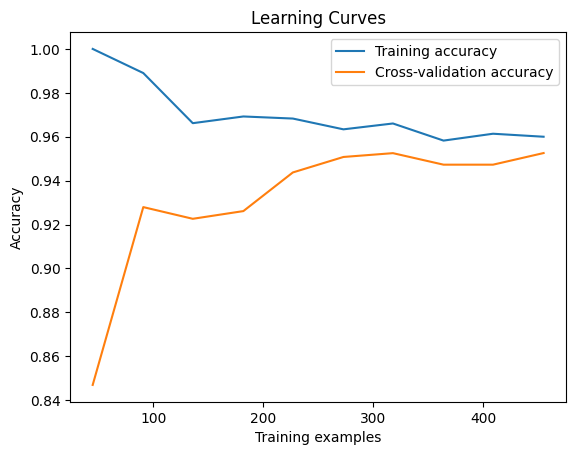

In [31]:
plt.plot(train_sizes, train_scores_mean, label='Training accuracy')
plt.plot(train_sizes, test_scores_mean, label='Cross-validation accuracy')
plt.xlabel('Training examples')
plt.ylabel('Accuracy')
plt.title('Learning Curves')
plt.legend()
plt.show()

# SVM  

In [34]:
# SVM model
svm_model = SVC()
start = time.time()
svm_model.fit(X_train, y_train)
svm_train_time = time.time() - start
svm_pred = svm_model.predict(X_test)
svm_acc = accuracy_score(y_test, svm_pred)
svm_f1 = f1_score(y_test, svm_pred)


In [39]:
model_pca_svm = SVC(max_iter=500)
start = time.time()
model_pca_svm.fit(X_train_pca, y_train)
train_time_pca_svm = time.time() - start
y_pred_pca_svm = model_pca_svm.predict(X_test_pca)
accuracy_pca_svm = accuracy_score(y_test, y_pred_pca)
f1_pca = f1_score(y_test, y_pred_pca)

In [37]:
print(f"SVM Accuracy: {svm_acc:.4f}, F1 Score: {svm_f1:.4f}, Training Time: {svm_train_time:.4f}s")
print(f"SVM with PCA Accuracy: {accuracy_pca_svm:.4f}, F1 Score: {f1_pca:.4f}, Training Time: {train_time_pca_svm:.4f}s")

SVM Accuracy: 0.9474, F1 Score: 0.9595, Training Time: 0.0090s
SVM with PCA Accuracy: 0.9649, F1 Score: 0.9726, Training Time: 0.0163s


# Random Forest

In [42]:
# Train and evaluate without PCA
rf = RandomForestClassifier()
start = time.time()
rf.fit(X_train, y_train)
train_time_no_pca = time.time() - start
y_pred_no_pca = rf.predict(X_test)
acc_no_pca = accuracy_score(y_test, y_pred_no_pca)
f1_no_pca = f1_score(y_test, y_pred_no_pca)

In [43]:
# Train and evaluate with PCA
rf_pca = RandomForestClassifier()
start = time.time()
rf_pca.fit(X_train_pca, y_train)
train_time_pca = time.time() - start
y_pred_pca = rf_pca.predict(X_test_pca)
acc_pca = accuracy_score(y_test, y_pred_pca)
f1_pca = f1_score(y_test, y_pred_pca)

In [44]:
print(f"Random Forest without PCA -> Accuracy: {acc_no_pca:.4f}, F1 Score: {f1_no_pca:.4f}, Training Time: {train_time_no_pca:.4f}s")
print(f"Random Forest with PCA -> Accuracy: {acc_pca:.4f}, F1 Score: {f1_pca:.4f}, Training Time: {train_time_pca:.4f}s")

Random Forest without PCA -> Accuracy: 0.9649, F1 Score: 0.9722, Training Time: 0.7434s
Random Forest with PCA -> Accuracy: 0.8596, F1 Score: 0.8841, Training Time: 0.1743s
